In [ ]:
pip install mecoda-nat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.1 MB 7.6 MB/s 


# Import libraries

In [ ]:
import numpy as np
np.random.seed(42)

import os
import glob
import cv2
import datetime
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from collections import Counter

from keras.applications import xception
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

import tensorflow as tf

from matplotlib import *
import matplotlib.pyplot as plt

import random

import json

from mecoda_nat import get_obs, get_dfs, get_count_by_taxon, download_photos

In [ ]:
import sklearn
import collections
import keras
import tensorflow
import matplotlib

In [ ]:
print("numpy version: " + str(np.__version__))
# print("os version: " + str(os.__version__))
# print("glob version: " + str(glob.__version__))
print("cv2 version: " + str(cv2.__version__))
print("pandas version: " + str(pd.__version__))
print("sklearn version: " + str(sklearn.__version__))
# print("collections version: " + str(collections.__version__))
print("keras version: " + str(keras.__version__))
print("tensorflow version: " + str(tensorflow.__version__))
print("matplotlib version: " + str(matplotlib.__version__))
print("json version: " + str(json.__version__))

numpy version: 1.21.6
cv2 version: 4.1.2
pandas version: 1.3.5
sklearn version: 1.0.2
keras version: 2.8.0
tensorflow version: 2.8.2
matplotlib version: 3.2.2
json version: 2.0.9


# Connection with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Variables

In [ ]:
seed = 42

# Functions

In [ ]:
def get_im_cv2(path):
  
    img = cv2.imread(path)

    try:
      img = cv2.resize(img, (224, 224), cv2.INTER_LINEAR)
    except:
      img = img
      
    final_image = xception.preprocess_input(img)

    return final_image

In [ ]:
def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3], seed)

def random_flip(image):
  return tf.image.random_flip_left_right(image, seed)

def random_flip_ud(image):
  return tf.image.random_flip_up_down(image, seed)

def random_brightness(image):
  return tf.image.random_brightness(image, random.random(), seed)

def random_contrast(image):
  lower = random.random()
  upper = random.random()
  while(lower > upper):
    upper = random.random()

  return tf.image.random_contrast(image, lower, upper, seed)

def random_saturation(image):
  lower = random.random()
  upper = random.random()
  while(lower > upper):
    upper = random.random()

  return tf.image.random_saturation(image, lower, upper, seed)


In [ ]:
def data_aumentation_crop(path):
    img = cv2.imread(path)
    img = random_crop(img)
    resized = cv2.resize(np.array(img), (224, 224), cv2.INTER_LINEAR)
    final_image = xception.preprocess_input(resized)
    return final_image

In [ ]:
def data_aumentation_flip(path):
    img = cv2.imread(path)
    img = random_flip(img)
    resized = cv2.resize(np.array(img), (224, 224), cv2.INTER_LINEAR)
    final_image = xception.preprocess_input(resized)
    return final_image

In [ ]:
def data_aumentation_filp_ud(path):
    img = cv2.imread(path)
    img = random_flip_ud(img)
    resized = cv2.resize(np.array(img), (224, 224), cv2.INTER_LINEAR)
    final_image = xception.preprocess_input(resized)
    return final_image

In [ ]:
def data_aumentation_bright(path):
    img = cv2.imread(path)
    img = random_brightness(img)
    resized = cv2.resize(np.array(img), (224, 224), cv2.INTER_LINEAR)
    final_image = xception.preprocess_input(resized)
    return final_image

In [ ]:
def data_aumentation_cont(path):
    img = cv2.imread(path)
    img = random_contrast(img)
    resized = cv2.resize(np.array(img), (224, 224), cv2.INTER_LINEAR)
    final_image = xception.preprocess_input(resized)
    return final_image

In [ ]:
def data_aumentation_sat(path):
    img = cv2.imread(path)
    img = random_saturation(img)
    resized = cv2.resize(np.array(img), (224, 224), cv2.INTER_LINEAR)
    final_image = xception.preprocess_input(resized)
    return final_image

In [ ]:
def load_train():

    X_train = []
    X_train_id = []
    y_train = []

    start_time = time.time()

    print('Read train images')

    years = [2021, 2020, 2019, 2018]

    folders = [ 'all_2021_actinopterygii', 
                'all_2020_actinopterygii', 
                'all_2019_actinopterygii', 
                'all_2018_actinopterygii']

    especies = ['Parablennius pilicornis', 
                'Sarpa salpa', 
                'Mullus surmuletus',
                'Thalassoma pavo',
                'Diplodus vulgaris', 
                'Coris julis',
                'Chromis chromis', 
                'Diplodus sargus', 
                'Oblada melanura',
                'Tripterygion tripteronotum', 
                'Gobius incognitus',
                'Serranus cabrilla', 
                'Symphodus roissali', 
                'Symphodus tinca',
                'Diplodus cervinus']

    for fld, year in zip(folders, years):

      print('Carpeta: ' + fld)

      index = 0

      obs = get_obs(year=year, taxon='actinopterygii')
      df_obs, df_photos = get_dfs(obs)

      for esp in especies:

        photos = df_photos[df_photos['taxon_name'] == esp]['path']

        print('Load Year {} - Especie {} - Index: {}'.format(year, esp, index))

        for photo in photos:

          # print(photo)

          if photo not in ('327418_418714.jpg', '327418_418715.jpg', '327418_418716.jpg', '278852_359484.jpg'):

            path_img = os.path.join('/content/drive/MyDrive/natusphera', f'{fld}', str(photo))
              
            img = get_im_cv2(path_img)
            X_train.append(img)
            X_train_id.append(esp)
            y_train.append(index)
        
        index = index + 1

    X_train = np.array(X_train, dtype = 'float32')
    y_train = np.array(y_train, dtype = 'int32')

    print('Read train data time: {} seconds'.format(round(time.time() - start_time, 2)))

    return X_train, y_train, X_train_id

# Load train, test and validation datasets

In [ ]:
x_train, y_train, x_train_id = load_train()

Read train images
Carpeta: all_2021_actinopterygii
Generando lista de observaciones:
Número de elementos: 200
Número de elementos: 400
Número de elementos: 600
Número de elementos: 800
Número de elementos: 1000
Número de elementos: 1200
Número de elementos: 1400
Número de elementos: 1600
Número de elementos: 1800
Número de elementos: 2000
Número de elementos: 2200
Número de elementos: 2400
Número de elementos: 2600
Número de elementos: 2800
Número de elementos: 3000
Número de elementos: 3200
Número de elementos: 3400
Número de elementos: 3600
Número de elementos: 3800
Número de elementos: 4000
Número de elementos: 4197
Load Year 2021 - Especie Parablennius pilicornis - Index: 0
Load Year 2021 - Especie Sarpa salpa - Index: 1
Load Year 2021 - Especie Mullus surmuletus - Index: 2
Load Year 2021 - Especie Thalassoma pavo - Index: 3
Load Year 2021 - Especie Diplodus vulgaris - Index: 4
Load Year 2021 - Especie Coris julis - Index: 5
Load Year 2021 - Especie Chromis chromis - Index: 6
Load 

In [ ]:
print(Counter(y_train).keys())
print(Counter(y_train).values())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
dict_values([752, 616, 595, 588, 582, 560, 490, 439, 381, 337, 272, 261, 262, 202, 201])


In [ ]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1-train_ratio, random_state=seed)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=seed) 

# Modeling

In [ ]:
base_model = xception.Xception(weights = 'imagenet', include_top = False)

In [ ]:
avg = GlobalAveragePooling2D()(base_model.output)

In [ ]:
output = Dense(15, activation = 'softmax')(avg)

In [ ]:
model = Model(inputs = base_model.input, outputs = output)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
optimizer = SGD(lr=0.2, momentum=0.9, decay=0.01)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
164/164 [==============================] - 112s 660ms/step - loss: 3.8216 - accuracy: 0.2677 - val_loss: 2.7814 - val_accuracy: 0.3838
Epoch 2/5
164/164 [==============================] - 112s 681ms/step - loss: 1.9251 - accuracy: 0.4642 - val_loss: 2.1126 - val_accuracy: 0.4205
Epoch 3/5
164/164 [==============================] - 103s 629ms/step - loss: 1.4191 - accuracy: 0.5495 - val_loss: 1.9382 - val_accuracy: 0.4251
Epoch 4/5
164/164 [==============================] - 105s 639ms/step - loss: 1.2346 - accuracy: 0.6033 - val_loss: 1.9721 - val_accuracy: 0.4388
Epoch 5/5
164/164 [==============================] - 103s 626ms/step - loss: 1.1273 - accuracy: 0.6327 - val_loss: 1.9037 - val_accuracy: 0.4541


In [ ]:
for layer in base_model.layers:
  layer.trainable = True

In [ ]:
optimizer = SGD(lr=0.1, momentum=0.9, decay=0.001)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
164/164 [==============================] - 468s 3s/step - loss: 2.4765 - accuracy: 0.1738 - val_loss: 2.7559 - val_accuracy: 0.1422
Epoch 2/5
164/164 [==============================] - 466s 3s/step - loss: 2.1949 - accuracy: 0.2717 - val_loss: 2.5197 - val_accuracy: 0.2722
Epoch 3/5
164/164 [==============================] - 467s 3s/step - loss: 1.8375 - accuracy: 0.3962 - val_loss: 1.9798 - val_accuracy: 0.3609
Epoch 4/5
164/164 [==============================] - 464s 3s/step - loss: 1.4432 - accuracy: 0.5394 - val_loss: 1.8196 - val_accuracy: 0.4037
Epoch 5/5
164/164 [==============================] - 464s 3s/step - loss: 1.1619 - accuracy: 0.6302 - val_loss: 1.8289 - val_accuracy: 0.4541


# Saving the model and the results

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/natusphera', 'second_model')) 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/natusphera/second_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/natusphera/second_model/')

In [ ]:
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open('/content/drive/MyDrive/natusphera/second_model/history', 'w'))

In [ ]:
history_dict = json.load(open('/content/drive/MyDrive/natusphera/second_model/history', 'r'))

# Results

In [ ]:
predictions = new_model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

In [ ]:
def plot_accuracy(history):

  # fig = figure.Figure(figsize=(10,5))

  # plot accuracy
  # plt.subplot(221)
  plt.plot(history['accuracy'], 'mo--', label = 'accuracy')
  plt.plot(history['val_accuracy'], 'co--', label = 'validation accuracy')
  plt.title('Accuracy: Train vs Validation')
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend()

In [ ]:
def plot_loss(history):

  # fig = figure.Figure(figsize=(10,5))

  # plot loss function
  # plt.subplot(222)
  plt.plot(history['loss'], 'mo--', label = 'accuracy')
  plt.plot(history['val_loss'], 'co--', label = 'validation loss')
  plt.title('Loss: Train vs Validation')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()

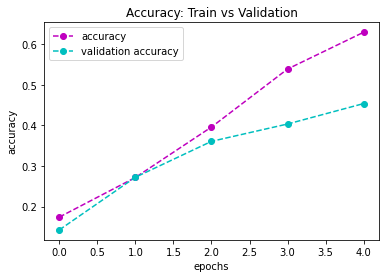

In [ ]:
plot_accuracy(history_dict)

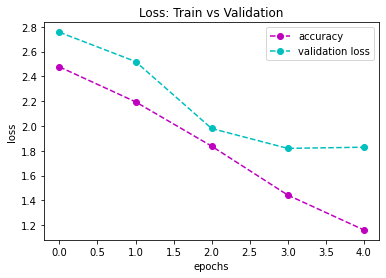

In [ ]:
plot_loss(history_dict)

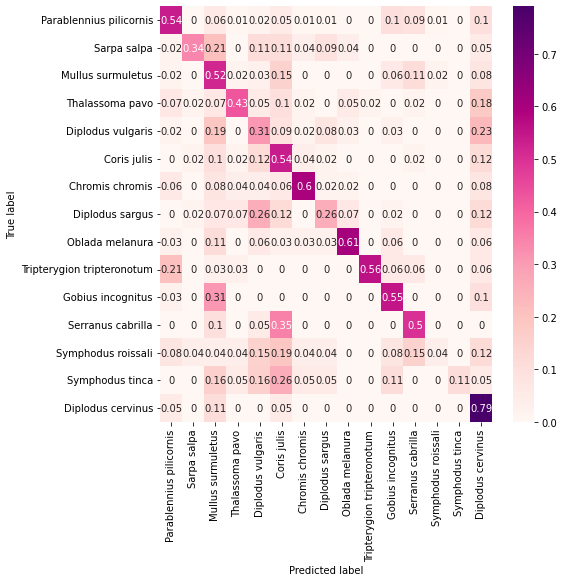

In [ ]:
classes = ['Parablennius pilicornis', 
                'Sarpa salpa', 
                'Mullus surmuletus',
                'Thalassoma pavo',
                'Diplodus vulgaris', 
                'Coris julis',
                'Chromis chromis', 
                'Diplodus sargus', 
                'Oblada melanura',
                'Tripterygion tripteronotum', 
                'Gobius incognitus',
                'Serranus cabrilla', 
                'Symphodus roissali', 
                'Symphodus tinca',
                'Diplodus cervinus']

con_mat = tf.math.confusion_matrix(y_test,pred_labels).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

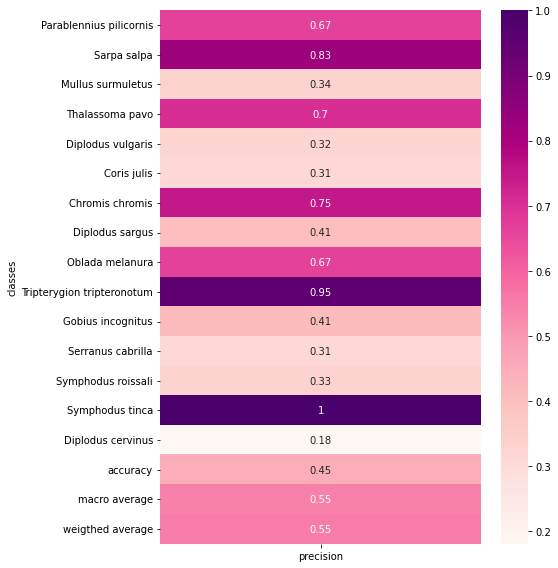

In [ ]:
report = classification_report(y_test, pred_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
classes.append('accuracy')
classes.append('macro average')
classes.append('weigthed average')
df['classes'] = classes
df = df.reset_index().drop(columns = 'index').set_index('classes')

figure = plt.figure(figsize=(8, 8))
sns.heatmap(df[['precision']], annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.show()

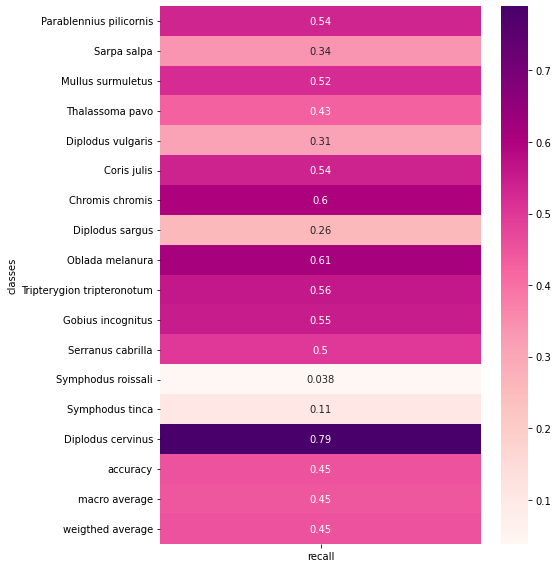

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(df[['recall']], annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.show()

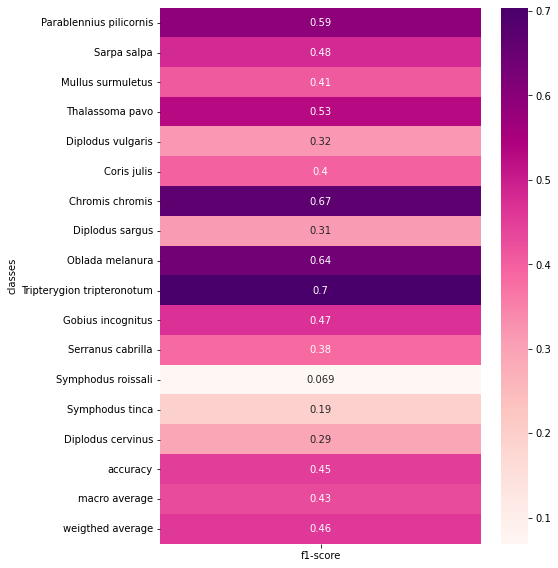

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(df[['f1-score']], annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.show()

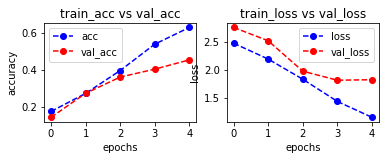

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(x_test, y_test)

21/21 [==============================] - 7s 352ms/step - loss: 1.8136 - accuracy: 0.4526


In [ ]:
test_loss_new = new_model.evaluate(x_test, y_test)

21/21 [==============================] - 8s 352ms/step - loss: 1.8136 - accuracy: 0.4526


In [ ]:
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

In [ ]:
predictions_new = model.predict(x_test)
pred_labels_new = np.argmax(predictions_new, axis=1)

In [ ]:
print(classification_report(y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.67      0.54      0.59        82
           1       0.83      0.34      0.48        56
           2       0.34      0.52      0.41        65
           3       0.70      0.43      0.53        61
           4       0.32      0.31      0.32        64
           5       0.31      0.54      0.40        50
           6       0.75      0.60      0.67        50
           7       0.41      0.26      0.31        43
           8       0.67      0.61      0.64        36
           9       0.95      0.56      0.70        34
          10       0.41      0.55      0.47        29
          11       0.31      0.50      0.38        20
          12       0.33      0.04      0.07        26
          13       1.00      0.11      0.19        19
          14       0.18      0.79      0.29        19

    accuracy                           0.45       654
   macro avg       0.55      0.45      0.43       654
weighted avg       0.55   

In [ ]:
print(classification_report(y_test,pred_labels_new))

              precision    recall  f1-score   support

           0       0.67      0.54      0.59        82
           1       0.83      0.34      0.48        56
           2       0.34      0.52      0.41        65
           3       0.70      0.43      0.53        61
           4       0.32      0.31      0.32        64
           5       0.31      0.54      0.40        50
           6       0.75      0.60      0.67        50
           7       0.41      0.26      0.31        43
           8       0.67      0.61      0.64        36
           9       0.95      0.56      0.70        34
          10       0.41      0.55      0.47        29
          11       0.31      0.50      0.38        20
          12       0.33      0.04      0.07        26
          13       1.00      0.11      0.19        19
          14       0.18      0.79      0.29        19

    accuracy                           0.45       654
   macro avg       0.55      0.45      0.43       654
weighted avg       0.55   